<center><h1>DSCI633 Foundations of Data Science and Analytics</h1></center>
<center><h2>PATIENT READMISSION</h2></center>
<center><h4>PROJECT -- Sridhar, Sreenidhi</h4></center>

<B>Import dataset and packages needed for the project.</B>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# Read the dataset (test and train)
df_train=pd.read_csv('diabetic_data_train.csv')
df_test=pd.read_csv('diabetic_data_test.csv')

In [3]:
# checking the datatypes and null_values in the train set 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76324 entries, 0 to 76323
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                76324 non-null  int64 
 1   encounter_id              76324 non-null  int64 
 2   patient_nbr               76324 non-null  int64 
 3   race                      76324 non-null  object
 4   gender                    76324 non-null  object
 5   age                       76324 non-null  object
 6   weight                    76324 non-null  object
 7   admission_type_id         76324 non-null  int64 
 8   discharge_disposition_id  76324 non-null  int64 
 9   admission_source_id       76324 non-null  int64 
 10  time_in_hospital          76324 non-null  int64 
 11  payer_code                76324 non-null  object
 12  medical_specialty         76324 non-null  object
 13  num_lab_procedures        76324 non-null  int64 
 14  num_procedures        

<b>Sanitizing the data</b>

In [4]:
# dropping the columns with high missing values --> weight, payercode, examide, citoglipton, glimepiride-pioglitazone
# dropping columns which are less correlated --> diag_1,diag_2, diag_3
# filling the null values with most frequently occurred value. 
def cleaning_dataset(df):
    df.replace('?',np.nan,inplace=True)
    df['medical_specialty'].fillna(df['medical_specialty'].mode().iloc[0],inplace=True)
    df['race'].fillna(df['race'].mode().iloc[0],inplace=True)
    df.drop(['weight','payer_code','examide','citoglipton','glimepiride-pioglitazone','diag_1','diag_2','diag_3'], axis=1,inplace=True)
    #df['readmitted'].value_counts()
    df.replace('<30','YES',inplace=True)
    df.replace('>30','NO',inplace=True)
    return df

In [5]:
#cleaning both train and test set
df_train=cleaning_dataset(df_train)
df_test=cleaning_dataset(df_test)
#check the null_values
df_train.isnull().sum()

Unnamed: 0                  0
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazo

<b>Preprocessing the data</b>

In [6]:
# changing all the categorical values into numerical values
def prepare(df):
    df['race'].replace(('Caucasian', 'Asian', 'AfricanAmerican', 'Hispanic', 'Other'),(1,2,3,4,5),inplace=True)
    df['gender'].replace(('Male','Female','Unknown/Invalid'),(1,2,3),inplace=True)
    df['age'].replace(('[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)','[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)'),(1,2,3,4,5,6,7,8,9,10),inplace=True)
    df['max_glu_serum'].replace(('Norm','>200','>300', 'None'),(1,2,3,4),inplace=True)
    df['A1Cresult'].replace(('Norm','>7','>8', 'None'),(1,2,3,4),inplace=True)
    df['medical_specialty'].replace(('AllergyandImmunology', 'Anesthesiology','Anesthesiology-Pediatric', 'Cardiology', 
                     'Cardiology-Pediatric', 'DCPTEAM', 'Dentistry', 'Dermatology', 
                     'Emergency/Trauma', 'Endocrinology', 'Endocrinology-Metabolism', 
                     'Family/GeneralPractice', 'Gastroenterology', 'Gynecology', 'Hematology',
                     'Hematology/Oncology', 'Hospitalist', 'InfectiousDiseases', 'InternalMedicine',
                     'Nephrology', 'Neurology', 'Neurophysiology', 
                     'Obsterics&Gynecology-GynecologicOnco', 'Obstetrics', 'ObstetricsandGynecology',
                     'Oncology', 'Ophthalmology', 'Orthopedics', 'Orthopedics-Reconstructive', 
                     'Osteopath', 'Otolaryngology', 'OutreachServices', 'Pathology', 'Pediatrics', 
                     'Pediatrics-AllergyandImmunology', 'Pediatrics-CriticalCare', 
                     'Pediatrics-EmergencyMedicine', 'Pediatrics-Endocrinology', 
                     'Pediatrics-Hematology-Oncology', 'Pediatrics-InfectiousDiseases', 
                     'Pediatrics-Neurology', 'Pediatrics-Pulmonology', 'Perinatology', 
                     'PhysicalMedicineandRehabilitation', 'PhysicianNotFound', 'Podiatry', 
                     'Proctology', 'Psychiatry', 'Psychiatry-Addictive', 'Psychiatry-Child/Adolescent',
                     'Psychology', 'Pulmonology', 'Radiologist', 'Radiology', 'Resident',
                     'Rheumatology', 'Speech', 'SportsMedicine', 'Surgeon', 'Surgery-Cardiovascular',
                     'Surgery-Cardiovascular/Thoracic', 'Surgery-Colon&Rectal', 'Surgery-General', 
                     'Surgery-Maxillofacial', 'Surgery-Neuro', 'Surgery-Pediatric', 'Surgery-Plastic',
                     'Surgery-PlasticwithinHeadandNeck', 'Surgery-Thoracic', 'Surgery-Vascular',
                     'SurgicalSpecialty', 'Urology'),(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,20, 21, 22, 23, 24, 25, 26, 27, 28, 29,30, 31, 32, 33, 34, 35, 36, 37, 38, 39,40, 41, 42, 43, 44, 45, 46, 47, 48, 49,50, 51, 52, 53, 54, 55, 56, 57, 58, 59,60, 61, 62, 63, 64, 65, 66, 67, 68, 69,70, 71, 72),inplace=True)
    
    df["metformin"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    df["repaglinide"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    df["glimepiride"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    df["rosiglitazone"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    df["pioglitazone"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    df["acarbose"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    df["tolbutamide"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    df["chlorpropamide"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    df["glyburide"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    df["miglitol"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    df["tolazamide"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    df["metformin-rosiglitazone"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    df["troglitazone"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    df["nateglinide"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    df["acetohexamide"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    df["glipizide"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    df["glyburide-metformin"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    df["glipizide-metformin"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    df["acetohexamide"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    df["insulin"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    df["metformin-pioglitazone"].replace(('No','Steady','Up','Down'), (2,3,4,1), inplace=True)
    
    df["change"].replace(('Ch', 'No'), (1, 2), inplace=True)
    
    df["diabetesMed"].replace(('No','Yes'), (1, 2), inplace=True)
    
    df["readmitted"].replace(('YES', 'NO'), (1, 2), inplace=True)
    return df

In [7]:
#preprocessing both train and test set
df_train_temp=prepare(df_train)
df_test_temp=prepare(df_test)
df_train_temp.dtypes

Unnamed: 0                  int64
encounter_id                int64
patient_nbr                 int64
race                        int64
gender                      int64
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
medical_specialty           int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
number_diagnoses            int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
repaglinide                 int64
nateglinide                 int64
chlorpropamide              int64
glimepiride                 int64
acetohexamide               int64
glipizide                   int64
glyburide                   int64
tolbutamide                 int64
pioglitazone  

<b>Min-Max Scaling</b>

In [8]:
# different weights of numerical values are present.
# Therefore, to the analyze the data we transform the variables into comparable scales.
def scaling(df):
    s = preprocessing.MinMaxScaler()
    names = df.columns
    d = s.fit_transform(df)
    s_df = pd.DataFrame(d, columns=names)
    return s_df

In [9]:
# Scaling both train and test set
s_df_train=scaling(df_train_temp)
s_df_test=scaling(df_test_temp)

In [10]:
# correlation of the attributes with respect to "readmitted"
correlation=s_df_train.corr().abs()
correlation["readmitted"]

Unnamed: 0                  0.011321
encounter_id                0.011726
patient_nbr                 0.003109
race                        0.000495
gender                      0.002813
age                         0.015013
admission_type_id           0.011684
discharge_disposition_id    0.055773
admission_source_id         0.006461
time_in_hospital            0.046452
medical_specialty           0.002383
num_lab_procedures          0.021977
num_procedures              0.010783
num_medications             0.039948
number_outpatient           0.019574
number_emergency            0.062044
number_inpatient            0.163013
number_diagnoses            0.048611
max_glu_serum               0.007040
A1Cresult                   0.019363
metformin                   0.021434
repaglinide                 0.008655
nateglinide                 0.001203
chlorpropamide              0.004673
glimepiride                 0.008565
acetohexamide               0.001283
glipizide                   0.000050
g

<b>HEATMAP to show the correlation between the attributes</b>

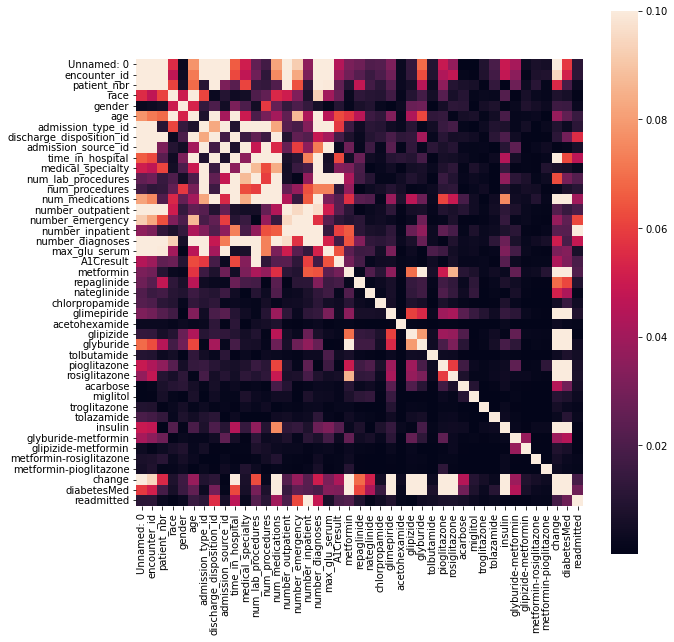

In [11]:
# heatmap to plot the correlation
heat_map = plt.subplots(figsize=(10, 10))
heat_map = sns.heatmap(correlation, vmax=.10, square=True)

<b>Feature selection</b>

In [12]:
# removing unwanted attributes of the dataset 
X_train=s_df_train.drop(columns=['Unnamed: 0','patient_nbr','encounter_id','readmitted'], axis=1)
y_train=s_df_train["readmitted"]

X_test=s_df_test.drop(columns=['Unnamed: 0','patient_nbr','encounter_id','readmitted'], axis=1)
y_test=s_df_test["readmitted"]

<b>Modelling</b><br>
Two models are depicted for this problem
<ol><li>Logistic Regression</li>
    <li>K-Nearest neighbor</li>
    <li>Random Forest</li></ol>
with the under sampled data

<b>LOGISTIC REGRESSION</b>

In [13]:
lg_original = LogisticRegression(max_iter=5000,random_state = 42)
lgf_original=lg_original.fit(X_train,y_train)
#lgf_original.score(X_train, y_train)

<b>Confusion matrix</b>

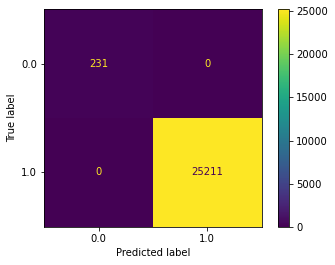

In [14]:
y_pred_original=lg_original.predict(X_test)
plot_confusion_matrix(lg_original, X_test,y_pred_original)  
plt.show()

In [15]:
# calculating metrics from confusion matrix
TP,FN,FP,TN=confusion_matrix(y_test,y_pred_original).ravel()

precision_lg_original=TP/(TP+FP)
recall_lg_original=TP/(TP+FN)
F_measure_lg_original= (2*precision_lg_original*recall_lg_original)/(precision_lg_original+recall_lg_original)

print("Recall:",recall_lg_original)
print("F1_measure:",F_measure_lg_original)

Recall: 0.03170130327580134
F1_measure: 0.05863192182410424


<b>Evaluation metrics</b>

In [17]:
accuracy_lg_original=lgf_original.score(X_test,y_test)
errorrate_lg_original=1-accuracy_lg_original
precision_lg_original=metrics.precision_score(y_test, y_pred_original)
print("Accuracy:",accuracy_lg_original)
print("Error rate:",errorrate_lg_original)
print("Precision:",precision_lg_original)

Accuracy: 0.8864083012341797
Error rate: 0.11359169876582031
Precision: 0.8909602951092777


<B>K-NEAREST NEIGHBOR</B>

In [19]:
knn_model_original = KNeighborsClassifier(n_neighbors=5)
k_fit_original=knn_model_original.fit(X_train, y_train)
#k_fit_original.score(X_train, y_train)

<b>Confusion matrix</b>

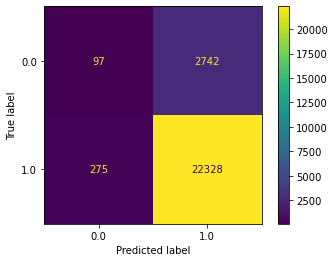

In [20]:
y_pred_original=knn_model_original.predict(X_test)
plot_confusion_matrix(knn_model_original, X_test,y_test)  
plt.show()

In [21]:
# calculating metrics from confusion matrix
TP,FN,FP,TN=confusion_matrix(y_test,y_pred_original).ravel()

precision_knn_original=TP/(TP+FP)
recall_knn_original=TP/(TP+FN)
F_measure_knn_original= (2*precision_knn_original*recall_knn_original)/(precision_knn_original+recall_knn_original)

print("Recall:",recall_knn_original)
print("F1_measure:",F_measure_knn_original)

Recall: 0.03416696019725255
F1_measure: 0.060417315478044215


<b>Evaluation metrics</b>

In [23]:
accuracy_knn_original=knn_model_original.score(X_test, y_test)
errorrate_knn_original=1-accuracy_knn_original
precision_knn_original=metrics.precision_score(y_test, y_pred_original)
print("Accuracy:",accuracy_knn_original)
print("Error rate:",errorrate_knn_original)
print("Precision:",precision_knn_original)

Accuracy: 0.8814165553022562
Error rate: 0.11858344469774384
Precision: 0.8906262465097726


<b>RANDOM FOREST</b>

In [24]:
randfor_original = RandomForestClassifier(n_estimators=100, max_depth=25, criterion = "entropy", min_samples_split=10)
ran_fit_original=randfor_original.fit(X_train, y_train)
#ran_fit_original.score(X_train, y_train)

<b>Confusion matrix</b>

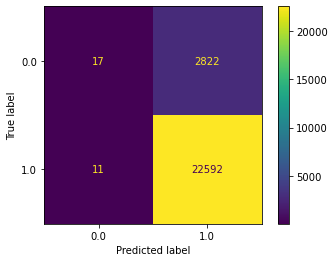

In [25]:
y_pred_original=randfor_original.predict(X_test)
plot_confusion_matrix(randfor_original, X_test,y_test)  
plt.show()

In [26]:
# calculating metrics from confusion matrix
TP,FN,FP,TN=confusion_matrix(y_test,y_pred_original).ravel()

precision_rf_original=TP/(TP+FP)
recall_rf_original=TP/(TP+FN)
F_measure_rf_original= (2*precision_rf_original*recall_rf_original)/(precision_rf_original+recall_rf_original)

print("Recall:",recall_rf_original)
print("F1_measure:",F_measure_rf_original)

Recall: 0.005988023952095809
F1_measure: 0.011859086152772935


<b>Evaluation metrics</b>

In [27]:
accuracy_rf_original=ran_fit_original.score(X_test,y_test)
errorrate_rf_original=1-accuracy_rf_original
precision_rf_original=metrics.precision_score(y_test, y_pred_original)
print("Accuracy:",accuracy_rf_original)
print("Error rate:",errorrate_rf_original)
print("Precision:",precision_rf_original)

Accuracy: 0.8886486911406336
Error rate: 0.1113513088593664
Precision: 0.8889588415833792


<h2>Under-sampling</h2><br>
Dataset is imbalanced. Under-sampling of dataset will help us to refine the dataset and gives best results.

In [28]:
under_sample = RandomUnderSampler(sampling_strategy='auto',random_state=42)
X_train_res, y_train_res = under_sample.fit_resample(X_train, y_train)
X_test_res, y_test_res = under_sample.fit_resample(X_test, y_test)
# results after undersampling
# y_train_res.value_counts()
print("length of X_train before undersampling -->",len(X_train))
print("length of X_train after undersampling -->",len(X_train_res))

length of X_train before undersampling --> 76324
length of X_train after undersampling --> 17036


<b>LOGISTIC REGRESSION AFTER UNDERSAMPLING</b>

In [29]:
lg = LogisticRegression(max_iter=5000,random_state = 42)
lgf=lg.fit(X_train_res,y_train_res)
#lgf.score(X_train_res, y_train_res)

<b>Confusion matrix</b>

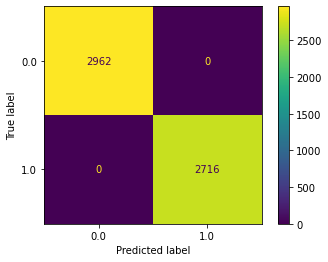

In [30]:
y_pred=lg.predict(X_test_res)
plot_confusion_matrix(lg, X_test_res,y_pred)  
plt.show()

In [31]:
# calculating metrics from confusion matrix
TP,FN,FP,TN=confusion_matrix(y_test_res,y_pred).ravel()

precision_lg=TP/(TP+FP)
recall_lg=TP/(TP+FN)
F_measure_lg= (2*precision_lg*recall_lg)/(precision_lg+recall_lg)

print("Recall:",recall_lg)
print("F1_measure:",F_measure_lg)

Recall: 0.6040859457555477
F1_measure: 0.5912773659713844


<b>Evaluation metrics</b>

In [32]:
accuracy_lg=lgf.score(X_test_res,y_test_res)
errorrate_lg=1-accuracy_lg
precision_lg=metrics.precision_score(y_test_res, y_pred)
print("Accuracy:",accuracy_lg)
print("Error rate:",errorrate_lg)
print("Precision:",precision_lg)

Accuracy: 0.5824233885170835
Error rate: 0.41757661148291647
Precision: 0.5861561119293078


<b>ROC-AUC curve</b>

roc_auc_score: 0.6355728495020494


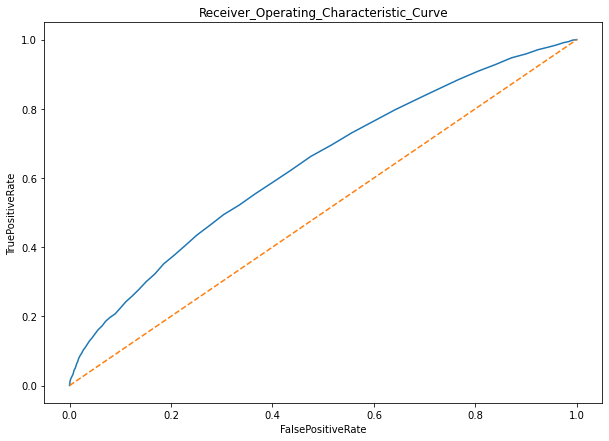

In [33]:
probas = lg.predict_proba(X_test)[:, 1]

def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]
#calculating evaluation metrics for all the threshold values
roc_values = []
for thresh in np.linspace(0, 1, 100):
    y_pred = get_preds(thresh, probas)
    tp,fn,fp,tn=confusion_matrix(y_test,y_pred).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)
#plotting ROC curve
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100),label='baseline',linestyle='--')
plt.title('Receiver_Operating_Characteristic_Curve')
plt.ylabel('TruePositiveRate')
plt.xlabel('FalsePositiveRate')
#roc_auc_score
print("roc_auc_score:",roc_auc_score(y_test, probas))

<B>K-NEAREST NEIGHBOR AFTER UNDERSAMPLING</B>

In [34]:
parameters = {"n_neighbors": range(1, 100)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train_res, y_train_res)
print(gridsearch.best_params_)

{'n_neighbors': 99}


<b>Confusion matrix</b>

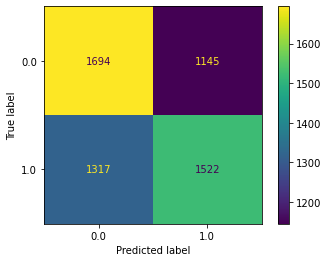

In [35]:
y_pred=gridsearch.predict(X_test_res)
plot_confusion_matrix(gridsearch, X_test_res,y_test_res)  
plt.show()

In [36]:
# calculating metrics from confusion matrix
TP,FN,FP,TN=confusion_matrix(y_test_res,y_pred).ravel()

precision_knn=TP/(TP+FP)
recall_knn=TP/(TP+FN)
F_measure_knn= (2*precision_knn*recall_knn)/(precision_knn+recall_knn)

print("Recall:",recall_knn)
print("F1_measure:",F_measure_knn)

Recall: 0.5966889749911941
F1_measure: 0.5791452991452992


<b>Evaluation metrics</b>

In [38]:
accuracy_knn=gridsearch.score(X_test_res, y_test_res)
errorrate_knn=1-accuracy_knn
precision_knn=metrics.precision_score(y_test_res, y_pred)
print("Accuracy:",accuracy_knn)
print("Error rate:",errorrate_knn)
print("Precision:",precision_knn)

Accuracy: 0.5663966185276506
Error rate: 0.43360338147234945
Precision: 0.5706786651668542


<b>ROC-AUC curve</b>

roc_auc_score: 0.5909545823473639


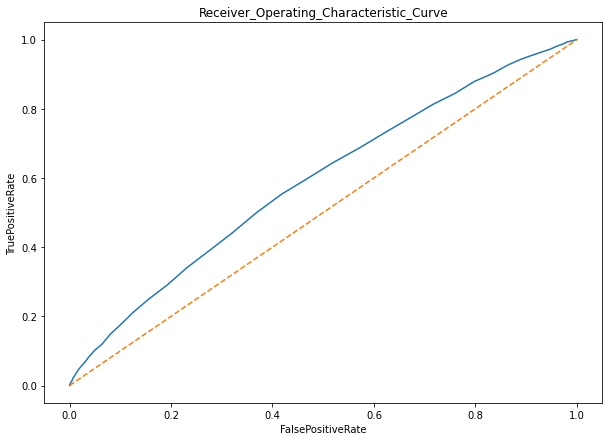

In [39]:
probas = gridsearch.predict_proba(X_test)[:, 1]

def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]
#calculating evaluation metrics for all the threshold values
roc_values = []
for thresh in np.linspace(0, 1, 100):
    y_pred = get_preds(thresh, probas)
    tp,fn,fp,tn=confusion_matrix(y_test,y_pred).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)
#plotting ROC curve
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100),label='baseline',linestyle='--')
plt.title('Receiver_Operating_Characteristic_Curve')
plt.ylabel('TruePositiveRate')
plt.xlabel('FalsePositiveRate')
#roc_auc_score
print("roc_auc_score:",roc_auc_score(y_test, probas))

<b>RANDOM FOREST AFTER UNDERSAMPLING</b>

In [40]:
randfor = RandomForestClassifier(n_estimators=100, max_depth=25, criterion = "entropy", min_samples_split=10)
ran_fit=randfor.fit(X_train_res, y_train_res)
#ran_fit.score(X_train_res, y_train_res)

<b>Confusion matrix</b>

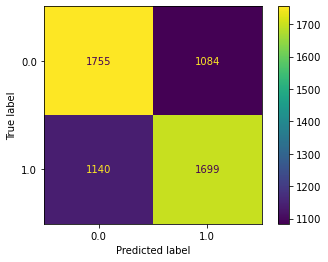

In [41]:
y_pred=randfor.predict(X_test_res)
plot_confusion_matrix(randfor, X_test_res,y_test_res)  
plt.show()

In [42]:
# calculating metrics from confusion matrix
TP,FN,FP,TN=confusion_matrix(y_test_res,y_pred).ravel()

precision_rf=TP/(TP+FP)
recall_rf=TP/(TP+FN)
F_measure_rf= (2*precision_rf*recall_rf)/(precision_rf+recall_rf)

print("Recall:",recall_rf)
print("F1_measure:",F_measure_rf)

Recall: 0.6181754138781261
F1_measure: 0.6121381234740146


<b>Evaluation metrics</b>

In [43]:
accuracy_rf=ran_fit.score(X_test_res,y_test_res)
errorrate_rf=1-accuracy_rf
precision_rf=metrics.precision_score(y_test_res, y_pred)
print("Accuracy:",accuracy_rf)
print("Error rate:",errorrate_rf)
print("Precision:",precision_rf)

Accuracy: 0.6083127861923212
Error rate: 0.3916872138076788
Precision: 0.6104922745238951


<b>ROC-AUC curve</b>

roc_auc_score: 0.6555191741949736


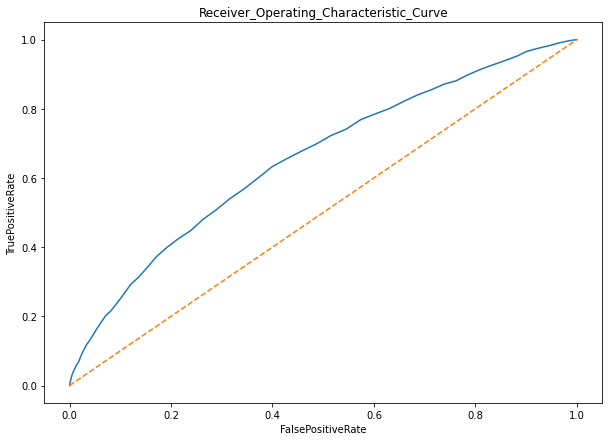

In [44]:
probas = randfor.predict_proba(X_test)[:, 1]

def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]
#calculating evaluation metrics for all the threshold values
roc_values = []
for thresh in np.linspace(0, 1, 100):
    y_pred = get_preds(thresh, probas)
    tp,fn,fp,tn=confusion_matrix(y_test,y_pred).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)
#plotting ROC curve
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100),label='baseline',linestyle='--')
plt.title('Receiver_Operating_Characteristic_Curve')
plt.ylabel('TruePositiveRate')
plt.xlabel('FalsePositiveRate')
#roc_auc_score
print("roc_auc_score:",roc_auc_score(y_test, probas))

<b>COMPARING BOTH THE MODELS BASED ON THEIR ACCURACY AND RECALL</b>

In [45]:
plt.figure(figsize=(4, 5))
models = ['Logistic Regression', 'Random Forest','k-nearest neighbor']
accuracy = [accuracy_lg, accuracy_rf, accuracy_knn]
recall=[recall_lg,recall_rf,recall_knn]

<Figure size 288x360 with 0 Axes>

<B>ACCURACY</B>

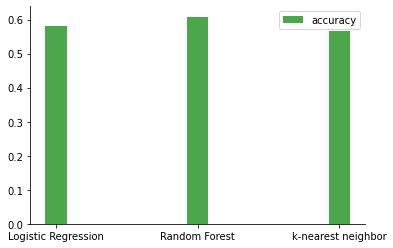

In [46]:
ax = plt.subplot(111)
plt.bar(models, accuracy, align='center', width = 0.15, alpha=0.7, color = 'green', label= 'accuracy')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()
plt.show()

<B>RECALL</B>

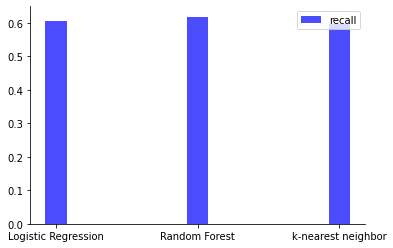

In [47]:
ax = plt.subplot(111)
plt.bar(models, recall, align='center', width = 0.15, alpha=0.7, color = 'blue', label= 'recall')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()
plt.show()

In [48]:
# end of notebook